In [200]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [201]:
# read the csv file
# lets limit the number of rows and columns to be displayed to 400

df1 = pd.read_csv('day.csv')


In [202]:
df1.shape

(730, 16)

In [203]:

df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [204]:
duplicated = df1.duplicated()
df1.duplicated().sum()


0

In [205]:
df1[duplicated]

# no duplicated values

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [206]:
df1.isnull().sum(axis = 1)



0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [207]:
df1.isnull().sum(axis = 0)



instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [208]:
(df1.isna().sum(axis = 0)/len(df1))*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [209]:
(df1.isna().sum(axis = 1)/len(df1))*100

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

In [210]:
print(df1.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [211]:
df1.shape

(730, 16)

In [212]:
df_1 = df1.iloc[:, 1:16]


In [213]:
df_1.shape

(730, 15)

In [214]:
df_1.columns.unique()

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [215]:
df_1.nunique(axis = 0)

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [216]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [217]:
# instant, dteday, casual & registered can be removed

In [218]:
df2 = df1[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
df2

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [219]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [220]:
# lets create dummy variables for categorical variables  'mnth', 'weekday', 'season' & 'weathersit'

In [221]:
df2[['season', 'weathersit', 'mnth', 'weekday']] = df2[['season', 'weathersit', 'mnth', 'weekday']].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [222]:
df2 = pd.get_dummies(df2, drop_first = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [223]:
df2.shape


(730, 30)

In [224]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [225]:
np.random.seed(3)
df_train, df_test = train_test_split(df2, train_size = .7, test_size = .3, random_state = 325)

In [226]:
df_train.info(), df_test.info()
df_train.shape, df_test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 511 to 111
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

((510, 30), (219, 30))

In [227]:
# EDA on df_train

In [228]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [229]:
# lets get the numeric variables in df_train and then pairplot them

In [230]:
df_train.select_dtypes(include = (['int64', 'float64'])).columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt'],
      dtype='object')

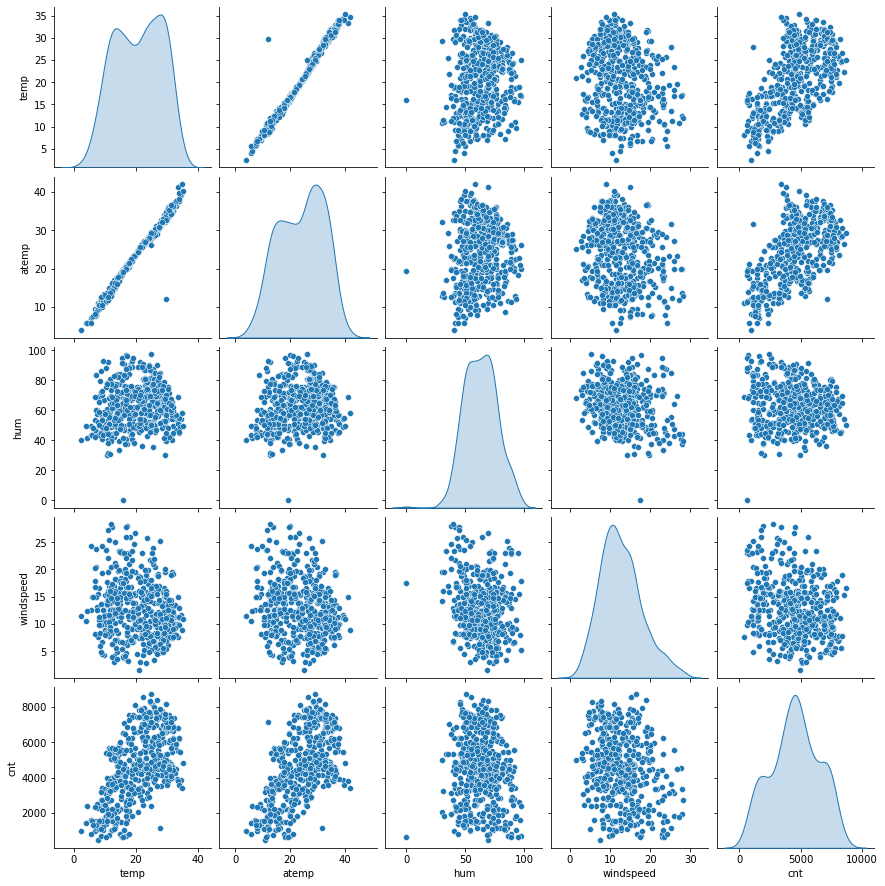

In [231]:
sns.pairplot(df_train[['temp', 'atemp', 'hum', 'windspeed','cnt']], diag_kind = 'kde');

In [232]:
# here we can see that in between cnt, temp and atemp they are linearly related

# now lets get the categorical variables in the df1 dataset and find how they are related


In [233]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [234]:
# we see that'season', 'mnth', 'weathersit', 'weekday', 'workingday', 'holiday'are the categorical variables
# now box plotting them against the target variable cnt

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

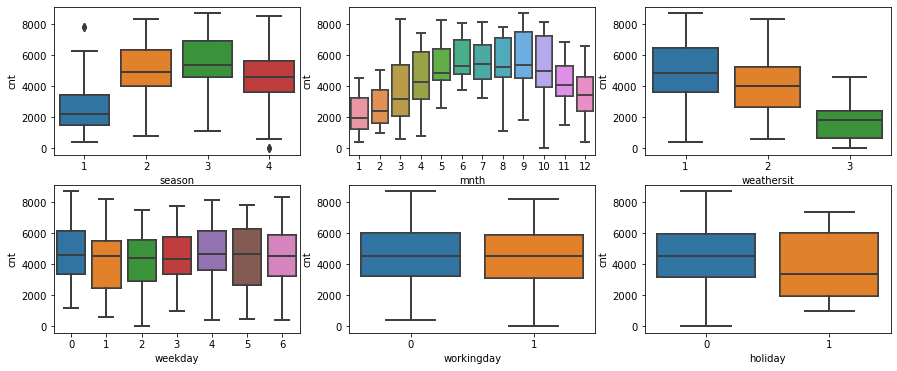

In [235]:
cat_cols_df1 = ['season', 'mnth', 'weathersit', 'weekday', 'workingday', 'holiday']

plt.figure(figsize = (15,6))
nrows = 2
for ind, col in enumerate(cat_cols_df1):
    for ind, col in enumerate(cat_cols_df1):
        plt.subplot(nrows, len(cat_cols_df1)/nrows, ind+1)
        # 2 is the number of rows in the subplot, len(cat_cols_df1) = 6 is the number of columns, ind the index of the subplot 
        sns.boxplot(x = col, y = 'cnt', data = df1)
plt.tight_layout

In [236]:
df1['season'].describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [107]:
# in season 3 more than 30% of the bike booking and with median more than 5000 bookings 
# the next most booking done was in season 2
# then next most bookings done was in season 4
# this could be eligible for a good predictor

# in months 5-9 the bookings were more than 4000 and about 10% of bookings were in these months
# this could be eligible for a good predictor


# in weathersit1 the median was about 5000 and the in the weathersit 2 the median was a little more than 4000 bookings.
# so 67% was in weathersit1 and 30% was in weathersit2.
# this could be eligible for a good predictor

# in a non holiday it is biased because 98% was booked during non holidays so it cant be a good predictor 

# in weekdays the range is 4000-5000 bookings for each day, 13.5-14.8% bookings from the overall bookings in every weekdays
# it can have some say on the prediction and lets use the model to take the decision if this variable should be taken into account or not

# in workingday median was almost 5000 bookings, almost 70% bookings were going on for two yrs time.
# this could be eligible for a good predictor


<AxesSubplot:>

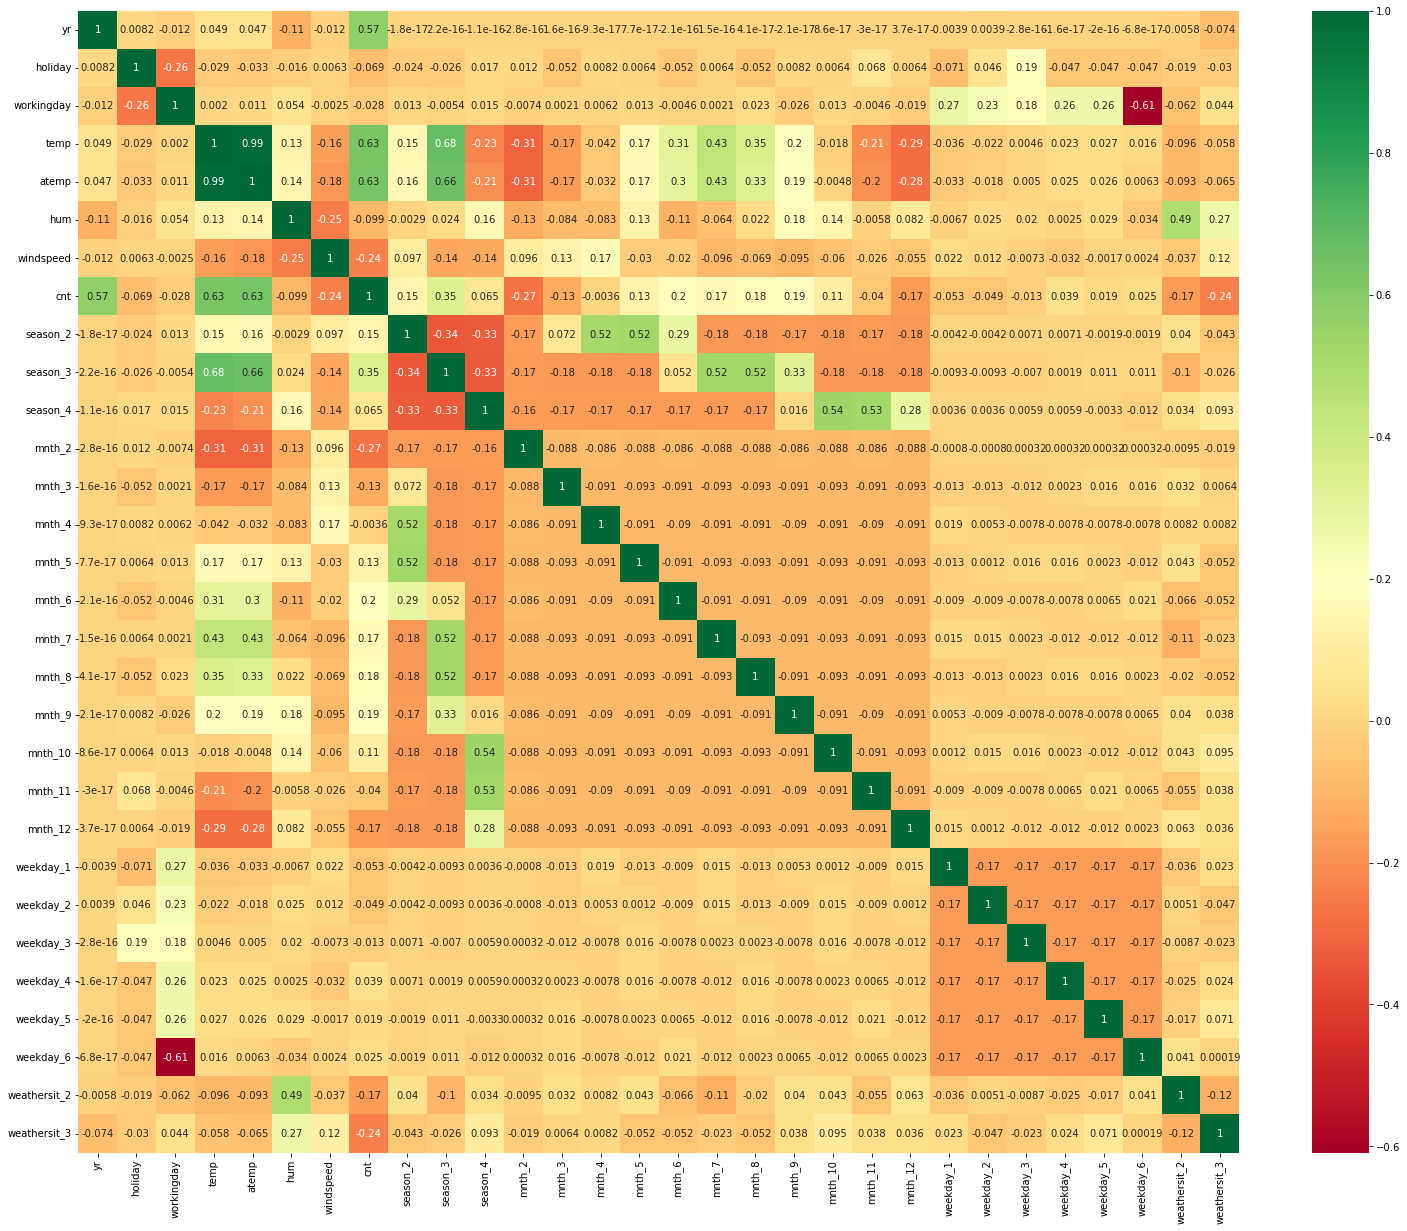

In [241]:
# lets make a correlation matrix for further analysis

plt.figure(figsize = (26,21))
sns.heatmap(df2.corr(), annot = True, cmap = 'RdYlGn');

In [109]:
# in this heatmap it can be seen that there is high collinearity between variables and target variables
# to know the appropriate variables to select the VIF, p values and this is analysed

In [110]:
df_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,0,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,0,0,1,0,0,0,0,0


In [111]:
# Now we rescale the df_train features

In [112]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,20.222164,23.594534,62.311249,12.755513,4499.627451,0.247059,0.262745,...,0.086275,0.076471,0.143137,0.152941,0.131373,0.139216,0.147059,0.143137,0.341176,0.025490
std,0.500487,0.151726,0.462054,7.498761,8.137295,14.410726,5.208598,1949.447686,0.431725,0.440557,...,0.281045,0.266010,0.350557,0.360284,0.338139,0.346511,0.354512,0.350557,0.474570,0.157763
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.000663,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.212850,12.083316,4510.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.947900,15.614484,5983.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [242]:
scaler = MinMaxScaler()
df_train[['temp', 'atemp', 'hum', 'windspeed','cnt']] = scaler.fit_transform(df_train[['temp', 'atemp', 'hum', 'windspeed','cnt']])
df_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
511,1,0,1,0.786094,0.738167,0.716795,0.482853,0.743692,1,0,...,0,0,1,0,0,0,0,0,0,0
163,0,0,1,0.717562,0.685963,0.508569,0.708724,0.554026,1,0,...,0,0,0,0,1,0,0,0,0,0
295,0,0,1,0.451738,0.450580,0.762211,0.193164,0.476880,0,0,...,0,0,0,1,0,0,0,0,0,0


In [243]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.490196,0.031373,0.670588,0.554232,0.528267,0.645597,0.419479,0.496266,0.250980,0.270588,...,0.086275,0.088235,0.147059,0.131373,0.137255,0.141176,0.139216,0.139216,0.327451,0.029412
std,0.500395,0.174494,0.470461,0.230461,0.216172,0.142234,0.191684,0.233215,0.434003,0.444700,...,0.281045,0.283915,0.354512,0.338139,0.344454,0.348545,0.346511,0.346511,0.469744,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354130,0.345078,0.537489,0.281937,0.344139,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.574785,0.558730,0.643316,0.395632,0.501569,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.752347,0.703990,0.746572,0.529230,0.670349,0.750000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
# we see the min value and max value is o and 1

In [116]:
# Linear Model building

In [ ]:
# Splitting df_train into X_train and y_train

X_train = df_train
y_train = df_train.pop('cnt')

In [244]:
X_train.shape, y_train.shape

((510, 29), (510,))

In [246]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [247]:
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

In [248]:
linear_model = LinearRegression() # istantiate
linear_model.fit(X_train, y_train) # fit on training data

# using recursive function elimination to select the most important features, its a feature selection technique
rec_feat_elim = RFE(linear_model, 15)
rec_feat_elim = rec_feat_elim.fit(X_train, y_train)# train the model on all the train data 
rec_feat_elim# trained on all the 29 features and target
list(zip(X_train.columns, rec_feat_elim.support_, rec_feat_elim.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 15),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [249]:
clm = X_train.columns[rec_feat_elim.support_]
clm

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [250]:
X_train.columns[~rec_feat_elim.support_] #  gives me list of the rest 14 columnnames

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [251]:
X_train[clm]

,yr,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_9,mnth_10,weekday_1,weekday_2,weathersit_2,weathersit_3
483,1,0.497426,0.487055,0.609956,0.194850,1,0,0,0,0,0,1,0,0,0
650,1,0.416433,0.409971,0.513852,0.255118,0,0,1,0,0,1,0,0,0,0
212,0,0.887856,0.819376,0.572294,0.276919,0,1,0,0,0,0,0,0,0,0
714,1,0.378013,0.381804,0.871429,0.161523,0,0,1,0,0,0,1,0,1,0
8,0,0.098690,0.048706,0.451083,0.700017,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0.477697,0.463017,0.424242,0.274350,1,0,0,0,0,0,0,0,0,0
444,1,0.588804,0.569931,0.853247,0.138467,1,0,0,1,0,0,0,0,1,0
46,0,0.322889,0.311266,0.439977,0.472919,0,0,0,0,0,0,0,0,0,0
374,1,0.310971,0.314713,0.671711,0.340487,0,0,0,0,0,0,0,0,0,0


In [125]:
# Model1

In [252]:
X_train_rec_feat_elim_df = X_train[clm]

In [253]:
vif = pd.DataFrame()
vif['Features'] = X_train_rec_feat_elim_df.columns
vif['VIF'] = [variance_inflation_factor(X_train_rec_feat_elim_df.values, i) for i in range(X_train_rec_feat_elim_df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,386.08
2,atemp,364.04
3,hum,16.13
6,season_3,7.11
4,windspeed,4.51
5,season_2,3.54
7,season_4,3.02
13,weathersit_2,2.15
0,yr,2.02
10,mnth_10,1.66


In [254]:
X_train_statmod1 = sm.add_constant(X_train_rec_feat_elim_df)
linr_model_1 = sm.OLS(y_train, X_train_statmod1).fit()
linr_model_1.params

const           0.238008
yr              0.228826
temp            0.394274
atemp           0.088717
hum            -0.170955
windspeed      -0.179931
season_2        0.132386
season_3        0.085290
season_4        0.152474
mnth_3          0.047074
mnth_9          0.100467
mnth_10         0.055654
weekday_1      -0.024262
weekday_2      -0.036756
weathersit_2   -0.047653
weathersit_3   -0.272332
dtype: float64

In [255]:
linr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.36e-185
Time:                        02:13:08   Log-Likelihood:                 506.80
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     494   BIC:                            -913.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2380      0.028      8.437      0.000       0.183       0.293
yr               0.2288      0.008     27.884      0.000       0.213       0.245
temp             0.3943      0.135      2.921      0.004       0.129       0.659
atemp            0.0887      0.138      0.642      0.521      -0.183       0.360
hum             -0.1710      0.038     -4.541      0.000      -0.245      -0.097
windspeed       -0.1799      0.028     -6.400      0.000      -0.235      -0.125
season_2         0.1324      0.015      8.669      0.000       0.102       0.162
season_3         0.0853      0.021      4.063      0.000       0.044       0.127
season_4         0.1525      0.014     10.648      0.000       0.124       0.181
mnth_3           0.0471      0.016      2.940      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.302      0.000       0.069       0.132
mnth_10          0.0557      0.018      3.101      0.002       0.020       0.091
weekday_1       -0.0243      0.012     -2.055      0.040      -0.047      -0.001
weekday_2       -0.0368      0.011     -3.218      0.001      -0.059      -0.014
weathersit_2    -0.0477      0.011     -4.450      0.000      -0.069      -0.027
weathersit_3    -0.2723      0.029     -9.533      0.000      -0.328      -0.216
==============================================================================
Omnibus:                       93.066   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.298
Skew:                          -0.933   Prob(JB):                     1.19e-49
Kurtosis:                       5.668   Cond. No.                         79.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# Model2

In [131]:
# atemp and temp has the highest vif, temp is an important feature for prediction so we dont drop it so we drop atem depending
# on large VIF and large p value
Xtrain_vc = X_train_rec_feat_elim_df.drop(['atemp'], axis = 1)

In [132]:
vif = pd.DataFrame()
vif['Features'] = Xtrain_vc.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_vc.values, i) for i in range(Xtrain_vc.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.19
2,hum,15.85
5,season_3,7.03
3,windspeed,4.35
4,season_2,3.54
6,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
9,mnth_10,1.66
8,mnth_9,1.28


In [133]:
X_train_statmod2 = sm.add_constant(Xtrain_vc)
linr_model_2 = sm.OLS(y_train, X_train_statmod2).fit()
linr_model_2.params

const           0.239301
yr              0.228801
temp            0.478180
hum            -0.170199
windspeed      -0.183401
season_2        0.132551
season_3        0.083833
season_4        0.152847
mnth_3          0.047300
mnth_9          0.100500
mnth_10         0.055765
weekday_1      -0.023908
weekday_2      -0.036461
weathersit_2   -0.047855
weathersit_3   -0.272823
dtype: float64

In [134]:
linr_model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.20e-186
Time:                        00:50:47   Log-Likelihood:                 506.59
No. Observations:                 510   AIC:                            -983.2
Df Residuals:                     495   BIC:                            -919.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2393      0.028      8.509      0.000       0.184       0.295
yr               0.2288      0.008     27.898      0.000       0.213       0.245
temp             0.4782      0.034     14.154      0.000       0.412       0.545
hum             -0.1702      0.038     -4.525      0.000      -0.244      -0.096
windspeed       -0.1834      0.028     -6.652      0.000      -0.238      -0.129
season_2         0.1326      0.015      8.686      0.000       0.103       0.163
season_3         0.0838      0.021      4.019      0.000       0.043       0.125
season_4         0.1528      0.014     10.689      0.000       0.125       0.181
mnth_3           0.0473      0.016      2.956      0.003       0.016       0.079
mnth_9           0.1005      0.016      6.308      0.000       0.069       0.132
mnth_10          0.0558      0.018      3.109      0.002       0.021       0.091
weekday_1       -0.0239      0.012     -2.028      0.043      -0.047      -0.001
weekday_2       -0.0365      0.011     -3.196      0.001      -0.059      -0.014
weathersit_2    -0.0479      0.011     -4.474      0.000      -0.069      -0.027
weathersit_3    -0.2728      0.029     -9.559      0.000      -0.329      -0.217
==============================================================================
Omnibus:                       92.167   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.631
Skew:                          -0.925   Prob(JB):                     4.53e-49
Kurtosis:                       5.655   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# Model 3

In [136]:
# drop hum since it has large vif 
Xtrain_vc = Xtrain_vc.drop(['hum'], axis = 1)

In [137]:
vif = pd.DataFrame()
vif['Features'] = Xtrain_vc.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_vc.values, i) for i in range(Xtrain_vc.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.20
4,season_3,6.69
2,windspeed,3.89
3,season_2,3.51
5,season_4,2.89
0,yr,2.01
8,mnth_10,1.66
11,weathersit_2,1.51
7,mnth_9,1.27
10,weekday_2,1.21


In [138]:
X_train_statmod3 = sm.add_constant(Xtrain_vc)
linr_model_3 = sm.OLS(y_train, X_train_statmod3).fit()
linr_model_3.params

const           0.141684
yr              0.232973
temp            0.446142
windspeed      -0.146573
season_2        0.134285
season_3        0.093151
season_4        0.149627
mnth_3          0.054857
mnth_9          0.092169
mnth_10         0.054644
weekday_1      -0.027920
weekday_2      -0.039708
weathersit_2   -0.076113
weathersit_3   -0.323355
dtype: float64

In [139]:
linr_model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.86e-183
Time:                        00:50:47   Log-Likelihood:                 496.25
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     496   BIC:                            -905.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1417      0.018      7.702      0.000       0.106       0.178
yr               0.2330      0.008     28.043      0.000       0.217       0.249
temp             0.4461      0.034     13.248      0.000       0.380       0.512
windspeed       -0.1466      0.027     -5.458      0.000      -0.199      -0.094
season_2         0.1343      0.016      8.634      0.000       0.104       0.165
season_3         0.0932      0.021      4.402      0.000       0.052       0.135
season_4         0.1496      0.015     10.277      0.000       0.121       0.178
mnth_3           0.0549      0.016      3.382      0.001       0.023       0.087
mnth_9           0.0922      0.016      5.713      0.000       0.060       0.124
mnth_10          0.0546      0.018      2.989      0.003       0.019       0.091
weekday_1       -0.0279      0.012     -2.330      0.020      -0.051      -0.004
weekday_2       -0.0397      0.012     -3.421      0.001      -0.063      -0.017
weathersit_2    -0.0761      0.009     -8.596      0.000      -0.094      -0.059
weathersit_3    -0.3234      0.027    -12.076      0.000      -0.376      -0.271
==============================================================================
Omnibus:                       86.928   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.931
Skew:                          -0.888   Prob(JB):                     8.59e-45
Kurtosis:                       5.529   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# model 4

In [141]:
Xtrain_vc = Xtrain_vc.drop(['season_3'], axis = 1)

In [142]:
vif = pd.DataFrame()
vif['Features'] = Xtrain_vc.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_vc.values, i) for i in range(Xtrain_vc.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.05
2,windspeed,3.72
0,yr,2.00
4,season_4,1.94
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.50
6,mnth_9,1.23
9,weekday_2,1.21
8,weekday_1,1.18


In [143]:
X_train_statmod4 = sm.add_constant(Xtrain_vc)
linr_model_4 = sm.OLS(y_train, X_train_statmod4).fit()
linr_model_4.params

const           0.125234
yr              0.231122
temp            0.564492
windspeed      -0.151266
season_2        0.083200
season_4        0.117244
mnth_3          0.043118
mnth_9          0.104368
mnth_10         0.042721
weekday_1      -0.024960
weekday_2      -0.038079
weathersit_2   -0.076298
weathersit_3   -0.315252
dtype: float64

In [144]:
linr_model_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          1.66e-180
Time:                        00:50:47   Log-Likelihood:                 486.48
No. Observations:                 510   AIC:                            -947.0
Df Residuals:                     497   BIC:                            -891.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1252      0.018      6.828      0.000       0.089       0.161
yr               0.2311      0.008     27.354      0.000       0.215       0.248
temp             0.5645      0.021     27.333      0.000       0.524       0.605
windspeed       -0.1513      0.027     -5.535      0.000      -0.205      -0.098
season_2         0.0832      0.011      7.891      0.000       0.062       0.104
season_4         0.1172      0.013      9.163      0.000       0.092       0.142
mnth_3           0.0431      0.016      2.646      0.008       0.011       0.075
mnth_9           0.1044      0.016      6.449      0.000       0.073       0.136
mnth_10          0.0427      0.018      2.320      0.021       0.007       0.079
weekday_1       -0.0250      0.012     -2.049      0.041      -0.049      -0.001
weekday_2       -0.0381      0.012     -3.224      0.001      -0.061      -0.015
weathersit_2    -0.0763      0.009     -8.462      0.000      -0.094      -0.059
weathersit_3    -0.3153      0.027    -11.589      0.000      -0.369      -0.262
==============================================================================
Omnibus:                       67.388   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.494
Skew:                          -0.768   Prob(JB):                     7.60e-29
Kurtosis:                       4.933   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
# model 5

In [146]:
# drop windspeed since it has a high vif
Xtrain_vc = Xtrain_vc.drop(['windspeed'], axis = 1)

In [147]:
vif = pd.DataFrame()
vif['Features'] = Xtrain_vc.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_vc.values, i) for i in range(Xtrain_vc.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.98
0,yr,1.93
3,season_4,1.89
6,mnth_10,1.61
2,season_2,1.54
9,weathersit_2,1.47
5,mnth_9,1.22
8,weekday_2,1.19
7,weekday_1,1.16
4,mnth_3,1.09


In [148]:
X_train_statmod5 = sm.add_constant(Xtrain_vc)
linr_model_5 = sm.OLS(y_train, X_train_statmod5).fit()
linr_model_5.params

const           0.060888
yr              0.228910
temp            0.584999
season_2        0.080058
season_4        0.125673
mnth_3          0.042071
mnth_9          0.109644
mnth_10         0.047376
weekday_1      -0.025261
weekday_2      -0.039895
weathersit_2   -0.074205
weathersit_3   -0.331612
dtype: float64

In [149]:
linr_model_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     201.1
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          3.07e-175
Time:                        00:50:48   Log-Likelihood:                 471.23
No. Observations:                 510   AIC:                            -918.5
Df Residuals:                     498   BIC:                            -867.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0609      0.015      4.169      0.000       0.032       0.090
yr               0.2289      0.009     26.350      0.000       0.212       0.246
temp             0.5850      0.021     27.973      0.000       0.544       0.626
season_2         0.0801      0.011      7.387      0.000       0.059       0.101
season_4         0.1257      0.013      9.610      0.000       0.100       0.151
mnth_3           0.0421      0.017      2.508      0.012       0.009       0.075
mnth_9           0.1096      0.017      6.593      0.000       0.077       0.142
mnth_10          0.0474      0.019      2.503      0.013       0.010       0.085
weekday_1       -0.0253      0.013     -2.014      0.044      -0.050      -0.001
weekday_2       -0.0399      0.012     -3.282      0.001      -0.064      -0.016
weathersit_2    -0.0742      0.009     -8.002      0.000      -0.092      -0.056
weathersit_3    -0.3316      0.028    -11.914      0.000      -0.386      -0.277
==============================================================================
Omnibus:                       67.442   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.945
Skew:                          -0.773   Prob(JB):                     1.65e-28
Kurtosis:                       4.905   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# here in this model the pvalues are low and there is least multicollinearity so we take it as our final model

In [151]:
# Assumption: Train data error terms distribution is normally distributed

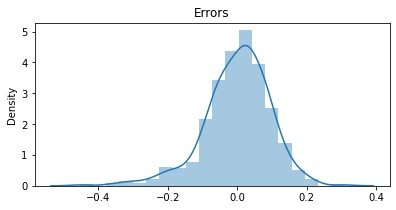

In [152]:
y_train_pred = linr_model_5.predict(X_train_statmod5)
residual = y_train-y_train_pred

plt.figure(figsize = (14,3))

plt.subplot(1,2,1)
sns.distplot(residual, bins = 20);
plt.title('Errors');


In [153]:
# here error terms is normally distributed so our assumption of being a normal distribution is valid

In [154]:
# Assumption: Linear relation exists among X and Y

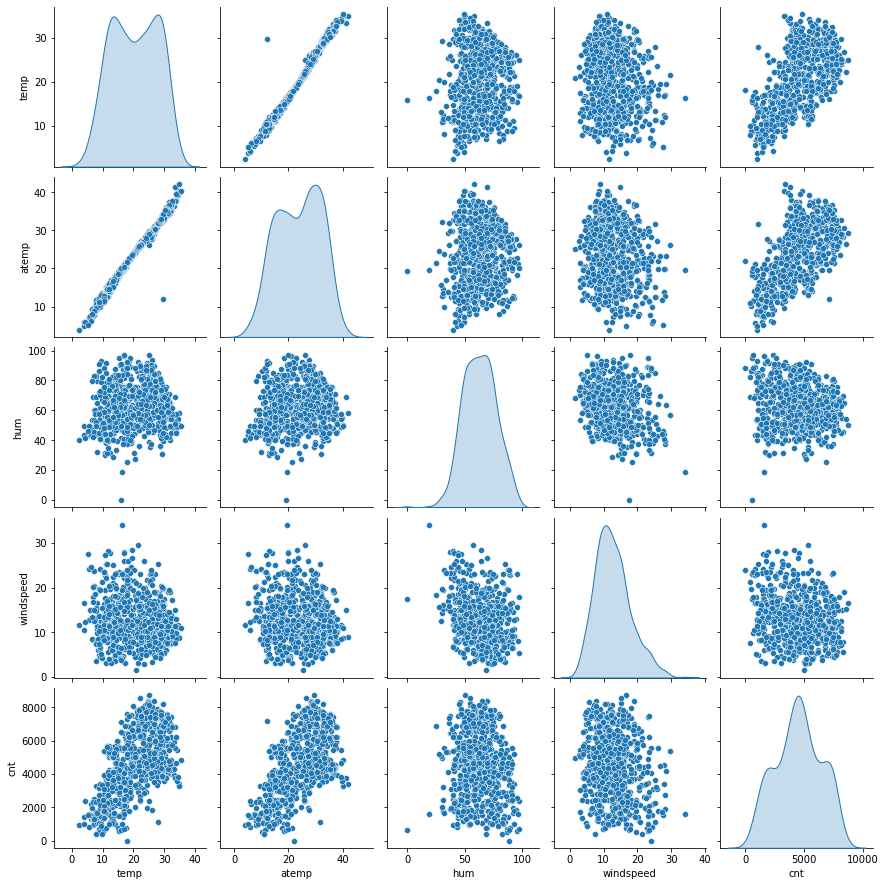

In [155]:
sns.pairplot(df2[['temp', 'atemp', 'hum', 'windspeed','cnt']], diag_kind = 'kde');

In [156]:
# predictor is cnt and it has linear relation with temp and atemp

In [157]:
# Assumption: no multicollinearity exist among variables

In [158]:
vif = pd.DataFrame()
vif['Features'] = Xtrain_vc.columns
vif['VIF'] = [variance_inflation_factor(Xtrain_vc.values, i) for i in range(Xtrain_vc.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.98
0,yr,1.93
3,season_4,1.89
6,mnth_10,1.61
2,season_2,1.54
9,weathersit_2,1.47
5,mnth_9,1.22
8,weekday_2,1.19
7,weekday_1,1.16
4,mnth_3,1.09


In [159]:
# all vifs are under 5 so no multicollnearity present

In [160]:
# now we predict using this model

In [161]:
# we scale the test data first, only the numerical variables 

In [162]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

In [172]:
nv = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[nv] = scaler.transform(df_test[['temp', 'atemp', 'hum', 'windspeed','cnt']])
# here we used only scaler and didnt fit 
# its because we would rather utilize metrics which the model learnt from the training data and implement them on this test data

In [173]:
df_test[nv].describe()

,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.551225,0.527528,0.662567,0.346706,0.518889
std,0.229463,0.215434,0.143562,0.159553,0.219953
min,0.046591,0.025950,0.301299,0.073090,0.055683
25%,0.356479,0.348019,0.553031,0.232689,0.364703
50%,0.557653,0.549198,0.662338,0.328208,0.525771
75%,0.751309,0.709163,0.762338,0.435708,0.676887
max,0.984424,0.980934,1.010390,0.824380,0.963300


In [174]:
# min max is between 0 and 1

In [175]:
df_test[nv]

,temp,atemp,hum,windspeed,cnt
22,0.046591,0.025950,0.453529,0.462217,0.110907
468,0.543115,0.536771,0.522511,0.347424,0.855729
553,0.951196,0.933712,0.596104,0.212829,0.534975
504,0.699909,0.662746,0.551083,0.478229,0.817648
353,0.407087,0.416610,0.618615,0.080770,0.428900
...,...,...,...,...,...
237,0.798555,0.762199,0.790909,0.126931,0.533709
611,0.830744,0.797844,0.784416,0.441027,0.787161
258,0.510926,0.501959,0.613420,0.292310,0.545099
518,0.677065,0.651150,0.512554,0.333343,0.876553


In [176]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,0,0,1,0,0,1,0


In [177]:
# getting X_test and y_test 

y_test = df_test.pop('cnt')
X_test = df_test

In [178]:
y_test.shape, X_test.shape

((219,), (219, 29))

In [179]:
X_test.info()
y_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

22     0.110907
468    0.855729
553    0.534975
504    0.817648
353    0.428900
         ...   
237    0.533709
611    0.787161
258    0.545099
518    0.876553
313    0.334906
Name: cnt, Length: 219, dtype: float64

In [180]:
linr_model_5.params

const           0.060888
yr              0.228910
temp            0.584999
season_2        0.080058
season_4        0.125673
mnth_3          0.042071
mnth_9          0.109644
mnth_10         0.047376
weekday_1      -0.025261
weekday_2      -0.039895
weathersit_2   -0.074205
weathersit_3   -0.331612
dtype: float64

In [181]:
column1 = Xtrain_vc.columns

In [182]:
column1

Index(['yr', 'temp', 'season_2', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10',
       'weekday_1', 'weekday_2', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [183]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [184]:
X_test = X_test[column1]
X_test.head()

,yr,temp,season_2,season_4,mnth_3,mnth_9,mnth_10,weekday_1,weekday_2,weathersit_2,weathersit_3
22,0,0.046591,0,0,0,0,0,0,1,0,0
468,1,0.543115,1,0,0,0,0,0,0,0,0
553,1,0.951196,0,0,0,0,0,1,0,0,0
504,1,0.699909,1,0,0,0,0,1,0,0,0
353,0,0.407087,0,1,0,0,0,0,0,1,0


In [185]:
X_test_linearModel6 = sm.add_constant(X_test)
X_test_linearModel6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   season_2      219 non-null    uint8  
 4   season_4      219 non-null    uint8  
 5   mnth_3        219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   mnth_10       219 non-null    uint8  
 8   weekday_1     219 non-null    uint8  
 9   weekday_2     219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(9)
memory usage: 8.8 KB


In [186]:
# predicting using linr_model_5

y_predicted = linr_model_5.predict(X_test_linearModel6)


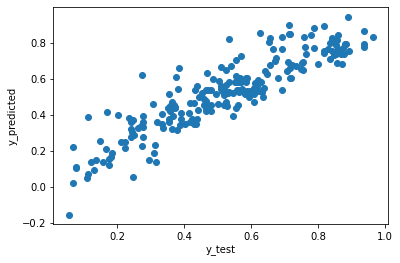

In [187]:
# Evaluating the performance of the model

plt.scatter(y_test, y_predicted)
plt.xlabel('y_test')
plt.ylabel('y_predicted');

In [190]:
print('test set rsquare is', r2_score(y_test, y_predicted))
print('test set adjusted rsquared is ', 1-(1-r2_score(y_test, y_predicted))*
      (X_test.shape[0] - 1)/(X_test.shape[0]-X_test.shape[1]-1))

test set rsquare is 0.8052515055958396
test set adjusted rsquared is  0.7949025517869228


In [189]:
# this is good model which generalizes good.